<a href="https://colab.research.google.com/github/Dh-arch1923/My-Work/blob/main/Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [24]:
heart=pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')
heart[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [25]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [26]:
#Convert the bool into string
heart['fbs']=heart['fbs'].astype(str)

<Axes: >

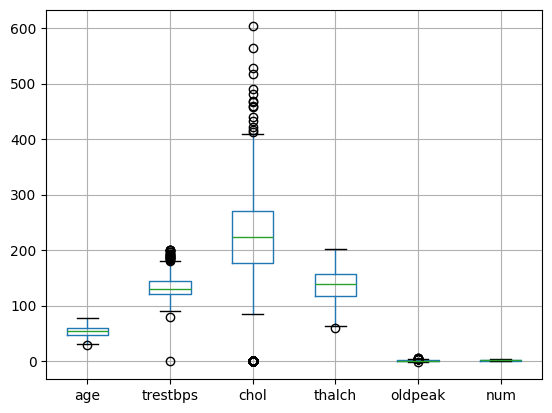

In [27]:
#Create a box plot
heart.boxplot()

In [28]:
from sklearn.preprocessing import LabelEncoder

# Select object (categorical) columns
col_object = heart.select_dtypes(include=['object']).columns
heart[col_object].astype(str)

# Create a dictionary to store LabelEncoders for each column
label_encoder = {}

# Apply LabelEncoder separately for each categorical column
for col in col_object:
    le = LabelEncoder()  # Create a new LabelEncoder instance for each column
    heart[col] = le.fit_transform(heart[col])
    label_encoder[col] = le  # Store the LabelEncoder instance for future use

# Print the first few rows
print(heart.head())



TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['bool', 'str']

In [29]:
heart[0:4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,False,2.3,downsloping,fixed defect,0
1,41,1,1,135,203,0,1,132,False,0.0,flat,fixed defect,0
2,57,1,0,140,192,0,1,148,False,0.4,flat,fixed defect,0
3,52,1,3,118,186,0,0,190,False,0.0,flat,fixed defect,0


In [30]:
label_encoder=preprocessing.LabelEncoder()
heart['slope_label']=label_encoder.fit_transform(heart['slope'])
heart['thal_label']=label_encoder.fit_transform(heart['thal'])
heart.drop(['slope','thal'],axis=1,inplace=True)


In [31]:
heart[0:4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,slope_label,thal_label
0,63,1,3,145,233,1,0,150,False,2.3,0,0,0
1,41,1,1,135,203,0,1,132,False,0.0,0,1,0
2,57,1,0,140,192,0,1,148,False,0.4,0,1,0
3,52,1,3,118,186,0,0,190,False,0.0,0,1,0


In [32]:
heart['exang'].astype(str)
heart.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalch,int64
exang,object
oldpeak,float64


In [33]:
heart['exang'].replace('FALSE','false')
heart['exang'].replace('TRUE','True')
heart['exang_label']=np.where(heart['exang']=='false',0,np.where(heart['exang']=='true',1,heart['exang']))
heart.drop('exang_label',axis=1,inplace=True)


In [34]:
heart.drop('exang',axis=1,inplace=True)

In [35]:
heart[0:4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,num,slope_label,thal_label
0,63,1,3,145,233,1,0,150,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0.0,0,1,0
2,57,1,0,140,192,0,1,148,0.4,0,1,0
3,52,1,3,118,186,0,0,190,0.0,0,1,0


In [36]:
heart['num_0']=heart['num']
heart[0:4]
heart.drop('num',axis=1,inplace=True)

In [37]:
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
oldpeak,62
slope_label,0


In [38]:
heart['oldpeak'].skew()
heart['oldpeak'].fillna(heart['oldpeak'].mean())

,oldpeak
0,2.300000
1,0.000000
2,0.400000
3,0.000000
4,1.500000
...,...
903,1.500000
904,3.000000
905,2.500000
906,0.891253


In [39]:
heart['num_0'].value_counts()

,count
num_0,
0,399
1,265
2,109
3,107
4,28


In [40]:
#Now divide the data into dependent and independent variables
X=heart.iloc[:,0:11] #independent variable
Y=heart.iloc[:,11] #dependent variable



In [41]:
#Now split the dat into traibing and testing purposde
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((635, 11), (635,), (273, 11), (273,))

In [42]:
#Now train it in the model
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[2] <= 0.5\nentropy = 1.913\nsamples = 635\nvalue = [275, 193, 78, 72, 17]'),
 Text(0.25, 0.625, 'x[8] <= 1.75\nentropy = 2.045\nsamples = 345\nvalue = [71, 142, 67, 52, 13]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 42.5\nentropy = 1.912\nsamples = 221\nvalue = [62, 97, 35, 22, 5]'),
 Text(0.0625, 0.125, 'entropy = 1.955\nsamples = 63\nvalue = [5, 26, 17, 13, 2]'),
 Text(0.1875, 0.125, 'entropy = 1.75\nsamples = 158\nvalue = [57, 71, 18, 9, 3]'),
 Text(0.375, 0.375, 'x[0] <= 59.5\nentropy = 2.06\nsamples = 124\nvalue = [9, 45, 32, 30, 8]'),
 Text(0.3125, 0.125, 'entropy = 1.917\nsamples = 74\nvalue = [6, 37, 14, 13, 4]'),
 Text(0.4375, 0.125, 'entropy = 2.018\nsamples = 50\nvalue = [3, 8, 18, 17, 4]'),
 Text(0.75, 0.625, 'x[0] <= 54.5\nentropy = 1.328\nsamples = 290\nvalue = [204, 51, 11, 20, 4]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 50.0\nentropy = 0.816\nsamples = 169\nvalue = [141, 22, 1, 4, 1]'),
 Text(0.5625, 0.125, '

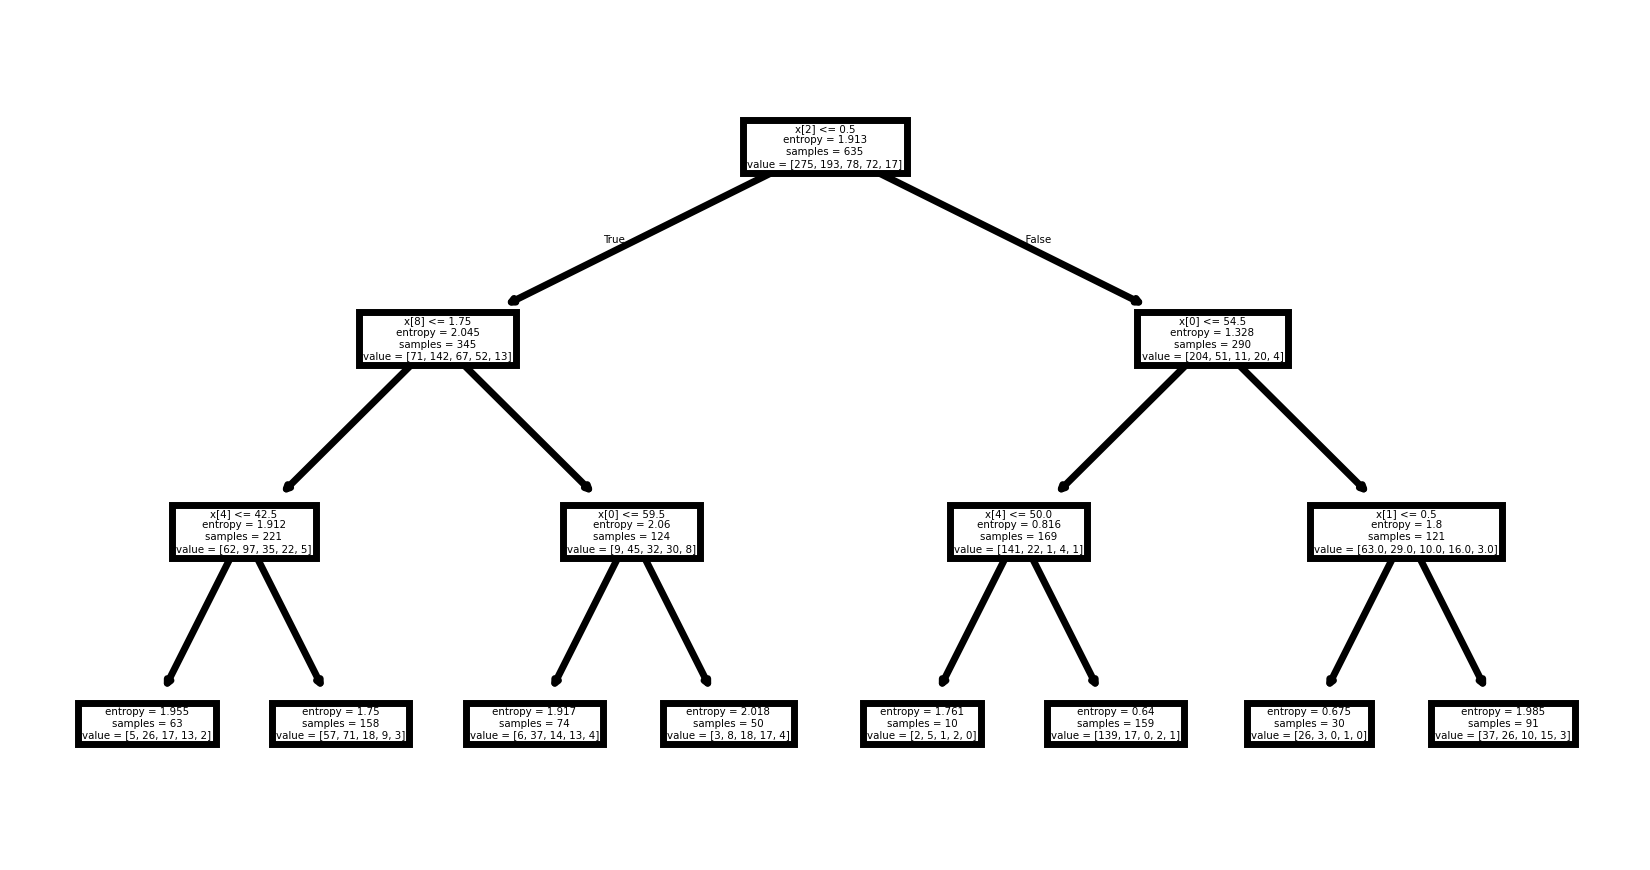

In [48]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(4,2),dpi=500)
tree.plot_tree(model)

Run the Model with different Hyperparameter

In [85]:
#Determine the y_pred
y_preds=model.predict(X_test)
y_preds

#Convert the y_pred into data frame
data=pd.DataFrame(y_preds,columns=['Predected_Chances_of_Heartattack'])
data
data['Actual_HeartAttack_Chances']=y_test
data[0:20]


,Predected_Chances_of_Heartattack,Actual_HeartAttack_Chances
0,0,NaN
1,0,0.0
2,1,0.0
3,1,NaN
4,1,NaN
5,0,0.0
6,1,NaN
7,1,NaN
8,0,0.0
9,0,NaN


In [87]:
#Check the accuracy of the model
from sklearn.metrics import accuracy_score
print('the accuracy of the model is: ',accuracy_score(y_preds,y_test))

the accuracy of the model is:  0.5374449339207048


In [81]:
#Now try for differnt combination and check the accuracy

#Now split the dat into traibing and testing purposde
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

#Now train it in the model
model=DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_split=8,min_samples_leaf=1)
model.fit(X_train,y_train)



(681, 11) (681,) (227, 11) (227,)


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=8)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\nentropy = 1.918\nsamples = 681\nvalue = [300, 200, 83, 78, 20]'),
 Text(0.25, 0.5, 'x[8] <= 1.75\nentropy = 2.073\nsamples = 364\nvalue = [75, 146, 70, 57, 16]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 1.95\nsamples = 235\nvalue = [67, 100, 36, 25, 7]'),
 Text(0.375, 0.16666666666666666, 'entropy = 2.053\nsamples = 129\nvalue = [8, 46, 34, 32, 9]'),
 Text(0.75, 0.5, 'x[0] <= 55.5\nentropy = 1.314\nsamples = 317\nvalue = [225, 54, 13, 21, 4]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.875\nsamples = 203\nvalue = [166, 28, 1, 7, 1]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.83\nsamples = 114\nvalue = [59.0, 26.0, 12.0, 14.0, 3.0]')]

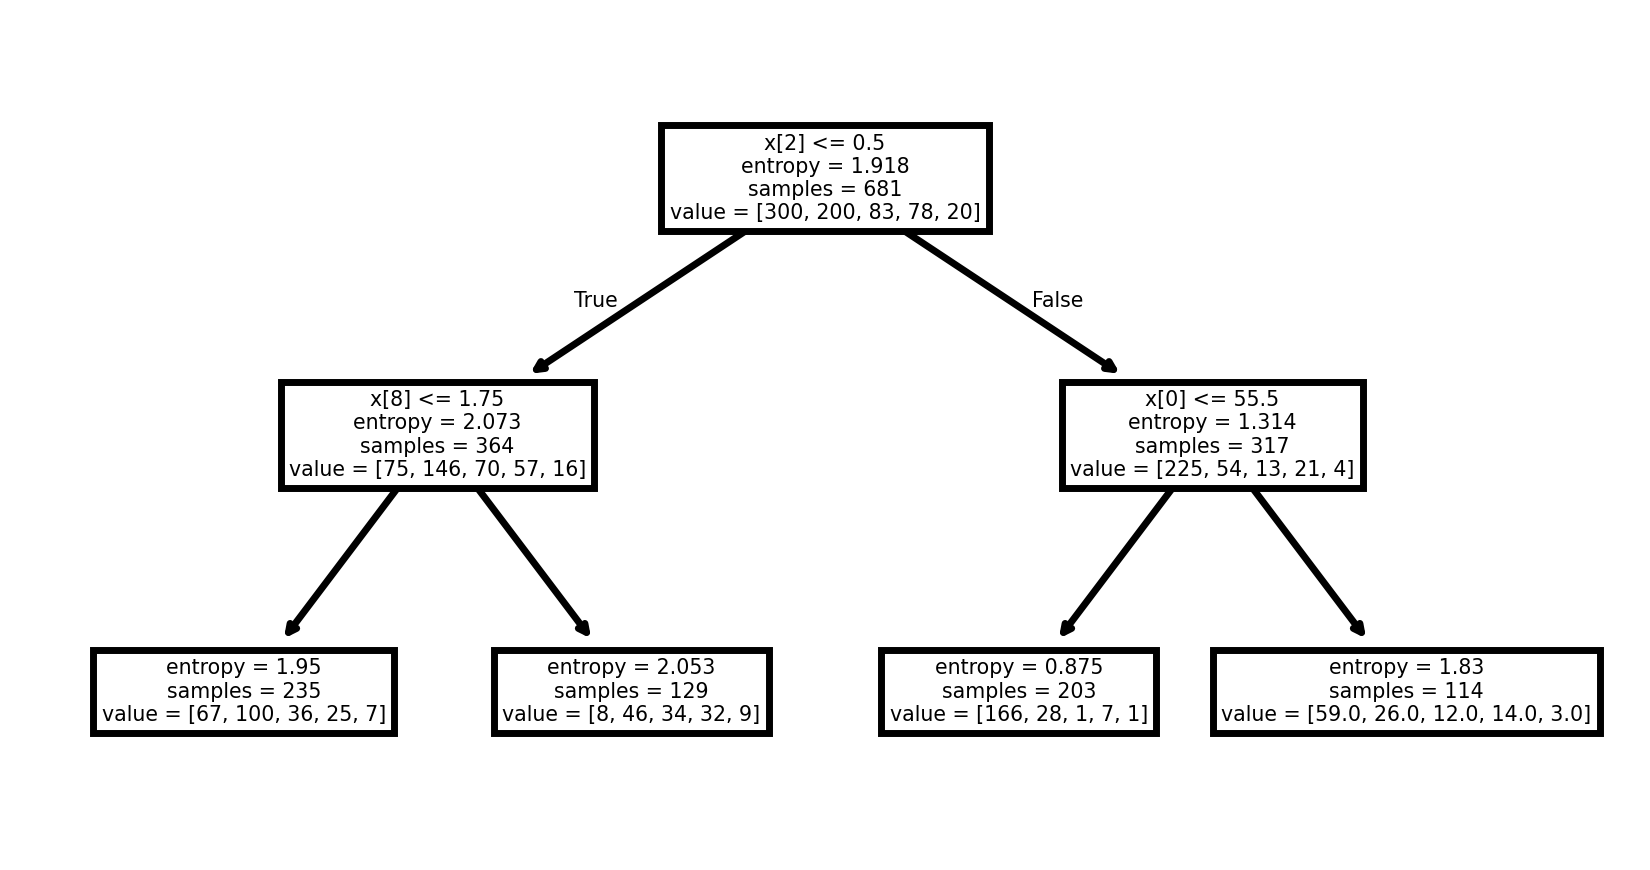

In [82]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(4,2),dpi=500)
tree.plot_tree(model)

In [83]:
#Determine the y_pred
y_pred=model.predict(X_test)
y_pred

#Convert the y_pred into data frame
dat=pd.DataFrame(y_pred,columns=['Predected_Chances_of_Heartattak'])
dat
dat['Actual_HeartAttack_Chance']=y_test
dat[0:20]

,Predected_Chances_of_Heartattak,Actual_HeartAttack_Chance
0,0,NaN
1,0,0.0
2,1,0.0
3,1,NaN
4,1,NaN
5,0,0.0
6,1,NaN
7,1,NaN
8,0,0.0
9,0,NaN


In [84]:
#Check the accuracy of the model
from sklearn.metrics import accuracy_score
print('the accuracy of the model is: ',accuracy_score(y_pred,y_test)*100)


the accuracy of the model is:  53.74449339207048
